<a href="https://colab.research.google.com/github/ashishkumarsaklani/Jam-project/blob/main/Jamboree_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [119]:
url ='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv'

df = pd.read_csv(url)

df = df.drop('Serial No.', axis=1)

#checking data
df.head().style.set_properties(**{'background':'black','border': '1.5px solid blue','color': 'red'})

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,1,0.920000
1,324,107,4,4.000000,4.500000,8.870000,1,0.760000
2,316,104,3,3.000000,3.500000,8.000000,1,0.720000
3,322,110,3,3.500000,2.500000,8.670000,1,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0,0.650000


In [120]:
#setting X and y

X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']



In [121]:
#spliting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1


In [123]:
print(X_train.shape)
print(y_train.shape)

(400, 7)
(400,)


In [124]:

# Initialize the model
model = LinearRegression()
model_scaled = LinearRegression()


# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [125]:
# Make predictions
y_pred = model.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')



Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631


In [126]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


             Feature  Coefficient
0          GRE Score     0.002434
1        TOEFL Score     0.002996
2  University Rating     0.002569
3                SOP     0.001814
4               LOR      0.017238
5               CGPA     0.112527
6           Research     0.024027


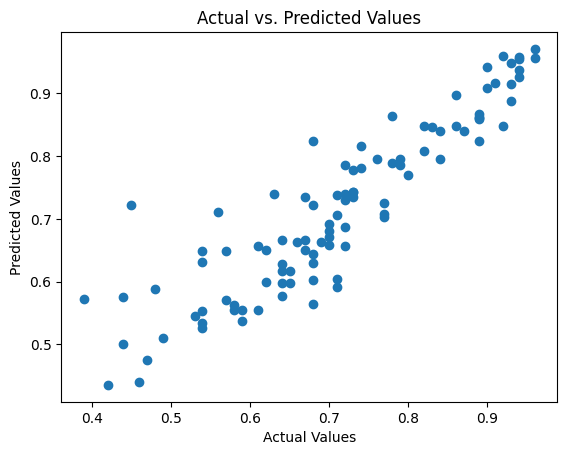

In [127]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [128]:

# Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred_scaled = model_scaled.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Value: {r2}')
print(f'Mean Squared scaled Error: {mse_scaled}')
print(f'R-squared scaled Value: {r2_scaled}')



Mean Squared Error: 0.003704655398788405
R-squared Value: 0.8188432567829631
Mean Squared scaled Error: 0.003704655398788409
R-squared scaled Value: 0.8188432567829629


In [129]:
X_test_scaled[:10]

array([[0.88      , 0.85714286, 0.75      , 0.75      , 0.57142857,
        0.87820513, 1.        ],
       [0.48      , 0.57142857, 0.75      , 0.875     , 0.71428571,
        0.71794872, 1.        ],
       [0.5       , 0.46428571, 0.25      , 0.25      , 0.28571429,
        0.2724359 , 0.        ],
       [0.44      , 0.60714286, 0.5       , 0.5       , 0.42857143,
        0.60576923, 0.        ],
       [0.72      , 0.71428571, 0.5       , 0.625     , 0.42857143,
        0.72115385, 1.        ],
       [0.78      , 0.67857143, 0.75      , 0.875     , 0.71428571,
        0.77884615, 1.        ],
       [0.        , 0.28571429, 0.        , 0.125     , 0.14285714,
        0.24358974, 0.        ],
       [0.22      , 0.5       , 0.75      , 0.375     , 0.42857143,
        0.53525641, 0.        ],
       [0.56      , 0.60714286, 0.5       , 0.625     , 0.71428571,
        0.77564103, 1.        ],
       [0.6       , 0.71428571, 0.75      , 0.5       , 0.85714286,
        0.66025641, 1. 

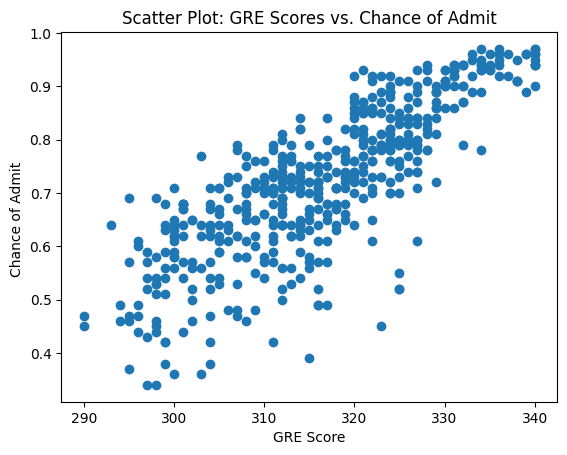

In [130]:
# Scatter plot for GRE Scores vs. Chance of Admit
plt.scatter(df['GRE Score'], df['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Scatter Plot: GRE Scores vs. Chance of Admit')
plt.show()

# Repeat for other predictor variables


In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Checking for Multicollinearity
#correlation_matrix = df.drop('Chance of Admit ', axis=1).corr()
#print(correlation_matrix)

# Calculating VIF
#X_with_intercept = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)


            Variable          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493


In [132]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [133]:
y_head,x_head = y_test[:10],X_test[:10]
y_head.values


array([0.93, 0.84, 0.39, 0.77, 0.74, 0.89, 0.47, 0.57, 0.68, 0.82])

In [134]:
y_pred_head = model.predict(x_head)
np.round(y_pred_head,2)

array([0.91, 0.8 , 0.57, 0.71, 0.82, 0.86, 0.47, 0.65, 0.82, 0.81])

In [135]:
y_pred_scaled_head = model_scaled.predict(x_head)
np.round(y_pred_head,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([0.91, 0.8 , 0.57, 0.71, 0.82, 0.86, 0.47, 0.65, 0.82, 0.81])